In [7]:
import time
import psutil
import numpy as np
import matplotlib.pyplot as plt

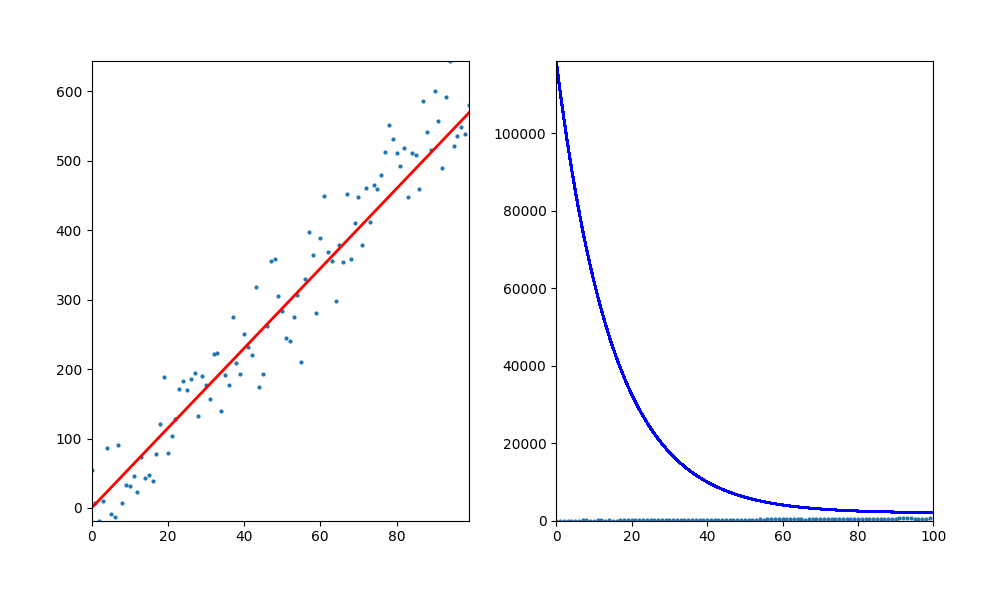

In [8]:
# Let us create some random data
data_size=100

mu, sigma = 1, 50 # mean and standard deviation
error=np.random.normal(mu, sigma, data_size)

x = np.arange(0 ,  data_size )
y = (6 * x) + error

plt.plot(x, y, 'o', markersize=2)

plt.show()

In [9]:
%matplotlib ipympl 
plt.rcParams['animation.html'] = 'jshtml'

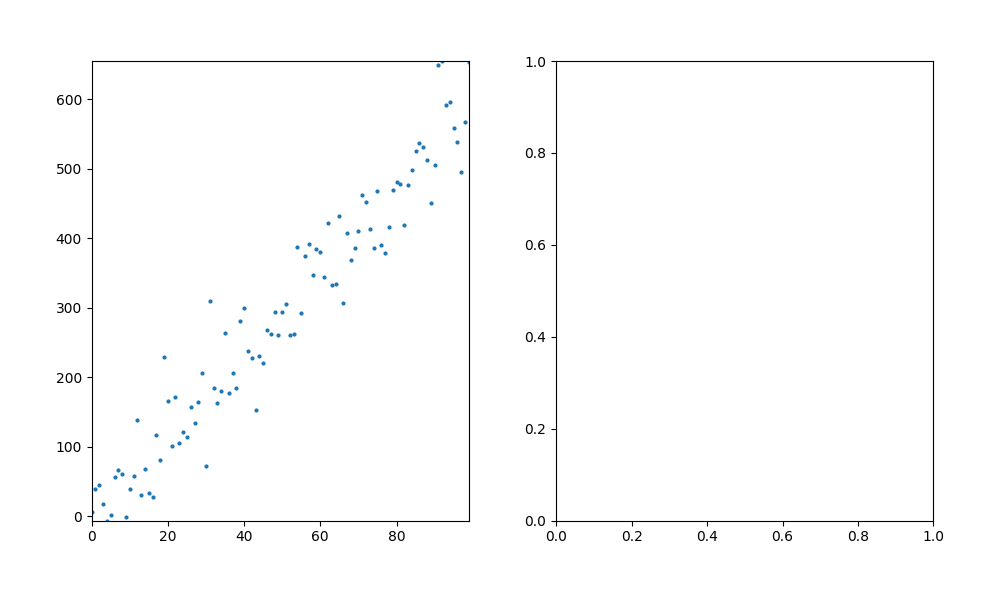

In [12]:
###### fig = plt.figure()
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

# first subfigure 
ax1=plt.subplot(1, 2, 1)

ax1.set_xlim(left = np.min(x), right=np.max(x))
ax1.set_ylim(bottom = np.min(y), top=np.max(y))

ax1.plot(x, y, 'o', markersize=2)

# second sub-figure 
plt.subplot(1, 2, 2)
ax2 = plt.subplot(1, 2, 2)

plt.tight_layout(pad=4.0)


In [13]:
b_current = 0 
m_current = 0
learningRate = 0.00001
num_iteration = 100 
precision = 0.1
previous_step_size = 1 
n = float(len(y)) 
print("Sample size", n)
oldCost=0
# Start of iterations
# Capital X and Y are numpy Arrays
# These two variables are just for visualtion 
xx, costHist = [], [] 
y_prediction = m_current * x + b_current
initCost= (1/n) * sum (( y_prediction - y)**2)
ax2.set_xlim(left = 0, right=num_iteration)
ax2.set_ylim(bottom = 0, top=initCost)
# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    # Calculate the prediction with current regression coefficients. 
    y_prediction = m_current * x + b_current
    # We compute costs just for monitoring 
    cost= (1/n) * sum (( y_prediction - y)**2)
    # calculate gradients. 
    m_gradient = (1.0/n) * sum (x*(y_prediction - y) )
    b_gradient = (1.0/n) * sum (y_prediction - y)
    # update the weights - Regression Coefficients 
    m_current = m_current - learningRate * m_gradient
    b_current = b_current - learningRate * b_gradient
    # Stop if the cost is not descreasing 
    if(abs(cost - oldCost) <= precision):
        print("Stoped at iteration", i)
        break
    oldCost = cost
    
    # Visualization 
    # abline(fig, ax1, m_current, b_current)
    x_vals = np.array(ax1.get_xlim())
    y_vals = m_current * x_vals  + b_current
    
    ax1.clear()
    ax1.set_xlim(left = np.min(x), right=np.max(x))
    ax1.set_ylim(bottom = np.min(y), top=np.max(y))
    ax1.plot(x, y, 'o', markersize=2)
    ax1.plot(x_vals, y_vals,  '-',  color='red', linewidth=2.0)
    # fig.canvas.draw()
    # Update the Cost Diagram. 
    xx.append(i)
    costHist.append(cost)    
    ax2.plot(xx, costHist, color='blue')
    fig.canvas.draw()
    
    if(i % 10 ==0):
        print("Iteration No.=", i ," m = ", m_current, " b=", b_current, " Cost=", cost) 

print("m = ", m_current, " b=", b_current)

Sample size 100.0
Iteration No.= 0  m =  0.19311711927148154  b= 0.0029017564483875824  Cost= 115650.64739405809
Iteration No.= 10  m =  1.8076668843314865  b= 0.0271457661000334  Cost= 60313.732021122014
Iteration No.= 20  m =  2.9638424834774413  b= 0.04447908094881198  Cost= 31937.197182770466
Iteration No.= 30  m =  3.79177745137057  b= 0.05686366467300655  Cost= 17385.830766373998
Iteration No.= 40  m =  4.384660097342836  b= 0.06570447471593545  Cost= 9923.95189078956
Iteration No.= 50  m =  4.80922234425146  b= 0.07200759770365327  Cost= 6097.53206043045
Iteration No.= 60  m =  5.113250760606431  b= 0.07649348983498128  Cost= 4135.360159621014
Iteration No.= 70  m =  5.330965192505176  b= 0.07967806805083978  Cost= 3129.166664730678
Iteration No.= 80  m =  5.486870388948185  b= 0.08193077922441884  Cost= 2613.194828720587
Iteration No.= 90  m =  5.5985141414090736  b= 0.08351618336776964  Cost= 2348.606573500122
m =  5.67161456847553  b= 0.08453026933114123
